Anggota Kelompok (NIM):  

-   **Felicya (23101910064)**
-   **David (23101910071)**
-   **Jonathan (23101910043)**  

Prodi Angkatan: **BM2019**  
Mata Kuliah: **Regression Analysis and Forecasting Techniques**  
Hal: **UAS**  
Data: **Monthly Average Temperature in Auckland 2005 - 2019**  

# Analisis Time Series and Forecasting Technique Terhadap Monthly Average Temperature in Auckland, 2005 - 2019<a href="#Analisis-Time-Series-and-Forecasting-Technique-Terhadap-Monthly-Average-Temperature-in-Auckland,-2005---2019" class="anchor-link">¶</a>

## Import Libraries & Classes

In \[1\]:

    # To tidy up data
    import pandas as pd
    import numpy as np
    from datetime import datetime

    # To create visualization
    import matplotlib.pyplot as plt
    import statsmodels.graphics.tsaplots as sgt
    import seaborn as sns

    # To set theme
    sns.set()

    # To model the data
    import scipy.stats
    import pylab
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    from scipy.stats.distributions import chi2
    import statsmodels.tsa.stattools as sts 
    from statsmodels.tsa.seasonal import seasonal_decompose
    from matplotlib import pyplot
    from sklearn.metrics import r2_score

    # To check error
    from sklearn.metrics import mean_squared_error

    # Remove warnings
    import warnings
    warnings.filterwarnings('ignore')

## Import Data<a href="#Import-Data" class="anchor-link">¶</a>

In \[2\]:

    DF = pd.read_csv(r'daily-temperature-1909-2019.csv', parse_dates = ['date']) #The date column is converted into datetime data type
    DF #DF is the raw data

Out\[2\]:

|         | location_name | date       | statistic | temperature | station_name_niwa  | agent_number |
|---------|---------------|------------|-----------|-------------|--------------------|--------------|
| 0       | Auckland      | 1966-01-01 | Maximum   | 22.2        | Auckland Aero      | 1962         |
| 1       | Auckland      | 1966-01-01 | Minimum   | 13.9        | Auckland Aero      | 1962         |
| 2       | Auckland      | 1966-01-01 | Average   | 18.1        | Auckland Aero      | 1962         |
| 3       | Auckland      | 1966-01-02 | Maximum   | 23.9        | Auckland Aero      | 1962         |
| 4       | Auckland      | 1966-01-02 | Minimum   | 17.1        | Auckland Aero      | 1962         |
| ...     | ...           | ...        | ...       | ...         | ...                | ...          |
| 2049466 | Whangarei     | 2019-12-30 | Minimum   | 12.7        | Whangarei Aero Aws | 1287         |
| 2049467 | Whangarei     | 2019-12-30 | Average   | 18.9        | Whangarei Aero Aws | 1287         |
| 2049468 | Whangarei     | 2019-12-31 | Maximum   | 24.1        | Whangarei Aero Aws | 1287         |
| 2049469 | Whangarei     | 2019-12-31 | Minimum   | 16.5        | Whangarei Aero Aws | 1287         |
| 2049470 | Whangarei     | 2019-12-31 | Average   | 20.3        | Whangarei Aero Aws | 1287         |

2049471 rows × 6 columns

In \[3\]:

    DF.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 2049471 entries, 0 to 2049470
    Data columns (total 6 columns):
     #   Column             Dtype         
    ---  ------             -----         
     0   location_name      object        
     1   date               datetime64[ns]
     2   statistic          object        
     3   temperature        float64       
     4   station_name_niwa  object        
     5   agent_number       int64         
    dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
    memory usage: 93.8+ MB

## Create Time Series Data<a href="#Create-Time-Series-Data" class="anchor-link">¶</a>

In \[4\]:

    df = DF[(DF['location_name'] == 'Auckland') & 
            (DF['statistic'] == "Average") & 
            (DF['date'] >= datetime(2005, 1, 1))].copy() #select average temperature daily data in Auckland, 2005 - 2019
    df

Out\[4\]:

|       | location_name | date       | statistic | temperature | station_name_niwa | agent_number |
|-------|---------------|------------|-----------|-------------|-------------------|--------------|
| 42737 | Auckland      | 2005-01-01 | Average   | 18.1        | Auckland Aero     | 1962         |
| 42740 | Auckland      | 2005-01-02 | Average   | 17.2        | Auckland Aero     | 1962         |
| 42743 | Auckland      | 2005-01-03 | Average   | 16.5        | Auckland Aero     | 1962         |
| 42746 | Auckland      | 2005-01-04 | Average   | 17.3        | Auckland Aero     | 1962         |
| 42749 | Auckland      | 2005-01-05 | Average   | 19.1        | Auckland Aero     | 1962         |
| ...   | ...           | ...        | ...       | ...         | ...               | ...          |
| 59156 | Auckland      | 2019-12-27 | Average   | 18.9        | Auckland Aero     | 1962         |
| 59159 | Auckland      | 2019-12-28 | Average   | 18.2        | Auckland Aero     | 1962         |
| 59162 | Auckland      | 2019-12-29 | Average   | 17.5        | Auckland Aero     | 1962         |
| 59165 | Auckland      | 2019-12-30 | Average   | 18.6        | Auckland Aero     | 1962         |
| 59168 | Auckland      | 2019-12-31 | Average   | 20.3        | Auckland Aero     | 1962         |

5478 rows × 6 columns

In \[5\]:

    df['temperature'].plot()
    plt.title('Daily Average Temperature in Auckland, 2005–2019')
    plt.show()

![](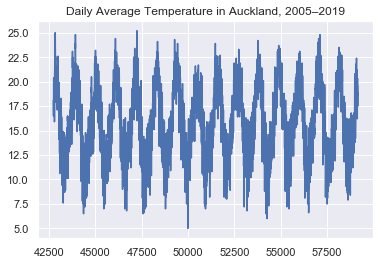%0A)

### Transforming Daily Data to Monthly Data<a href="#Transforming-Daily-Data-to-Monthly-Data" class="anchor-link">¶</a>

In \[6\]:

    ts = df.loc[:, ["date", "temperature"]]
    ts.index = ts.date #assign date as index to make time series data
    ts = ts.resample('1M').mean() 
    ts

Out\[6\]:

|            | temperature |
|------------|-------------|
| date       |             |
| 2005-01-31 | 19.306452   |
| 2005-02-28 | 21.239286   |
| 2005-03-31 | 19.796774   |
| 2005-04-30 | 16.450000   |
| 2005-05-31 | 15.161290   |
| ...        | ...         |
| 2019-08-31 | 12.093548   |
| 2019-09-30 | 13.323333   |
| 2019-10-31 | 14.609677   |
| 2019-11-30 | 17.433333   |
| 2019-12-31 | 19.312903   |

180 rows × 1 columns

## Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

### Check Null and Duplicated Entries<a href="#Check-Null-and-Duplicated-Entries" class="anchor-link">¶</a>

In \[7\]:

    ts.isnull().sum()

Out\[7\]:

    temperature    0
    dtype: int64

In \[8\]:

    ts.duplicated().sum()

Out\[8\]:

    0

=======================================================================================================================  
There is no null and duplicated entry.
=======================================================================================================================  

### Check and Fix Data Type for Each Column<a href="#Check-and-Fix-Data-Type-for-Each-Column" class="anchor-link">¶</a>

In \[9\]:

    ts.info()

    <class 'pandas.core.frame.DataFrame'>
    DatetimeIndex: 180 entries, 2005-01-31 to 2019-12-31
    Freq: M
    Data columns (total 1 columns):
     #   Column       Non-Null Count  Dtype  
    ---  ------       --------------  -----  
     0   temperature  180 non-null    float64
    dtypes: float64(1)
    memory usage: 2.8 KB

=======================================================================================================================  
The data type is appropriate.
=======================================================================================================================  

### Plotting The Data<a href="#Plotting-The-Data" class="anchor-link">¶</a>

In \[10\]:

    ts['temperature'].plot()
    plt.title('Monthly Average Temperature in Auckland, 2005–2019')
    plt.show()

![](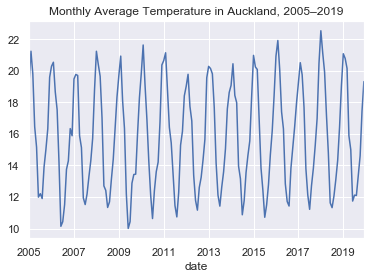%0A)

=======================================================================================================================  
In our hypothesis, an overview of the graph shows that:

1.  There is no trend in the data
2.  Seasonality exist since the highest temperature happened on june -
    july and the lowest temperature happened on dec - jan
3.  No cyclic behaviour present in the data

=======================================================================================================================  

### Train Test Split<a href="#Train-Test-Split" class="anchor-link">¶</a>

In \[11\]:

    size = int(len(ts)*0.8) #take 80% of the initial data as train data and 20% as test data
    ts_train, ts_test = ts.iloc[:size], ts.iloc[size:]
    ts_train

Out\[11\]:

|            | temperature |
|------------|-------------|
| date       |             |
| 2005-01-31 | 19.306452   |
| 2005-02-28 | 21.239286   |
| 2005-03-31 | 19.796774   |
| 2005-04-30 | 16.450000   |
| 2005-05-31 | 15.161290   |
| ...        | ...         |
| 2016-08-31 | 11.425806   |
| 2016-09-30 | 13.823333   |
| 2016-10-31 | 15.132258   |
| 2016-11-30 | 16.463333   |
| 2016-12-31 | 17.970968   |

144 rows × 1 columns

### Check Stationarity of The Train Dataset<a href="#Check-Stationarity-of-The-Train-Dataset" class="anchor-link">¶</a>

\$H_0\$ = Data is not stationary

\$H_1\$ = Data is stationary

In \[12\]:

    # check_adfuller
    def check_adfuller(ts):
        # Dickey-Fuller test
        result = sts.adfuller(ts, autolag = 'AIC')
        print(f'''Test statistic: {result[0]}
    p-value: {result[1]}
    Critical Values: {result[4]}''')

    # check_mean_std
    def check_mean_std(ts, n):
        # Rolling statistics
        rolmean = ts.rolling(n).mean()
        rolstd = ts.rolling(n).std()
        plt.figure(figsize = (22, 10))   
        orig = plt.plot(ts, color = 'red', label = 'Original')
        mean = plt.plot(rolmean, color = 'black', label = 'Rolling Mean')
        std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
        plt.xlabel("Date")
        plt.ylabel("Mean Temperature")
        plt.title('Rolling Mean & Standard Deviation')
        plt.legend(fontsize = 15)
        plt.show()
        
    # check stationary: mean, variance(std) and adfuller test
    check_mean_std(ts_train, 12)
    check_adfuller(ts_train.temperature)

![](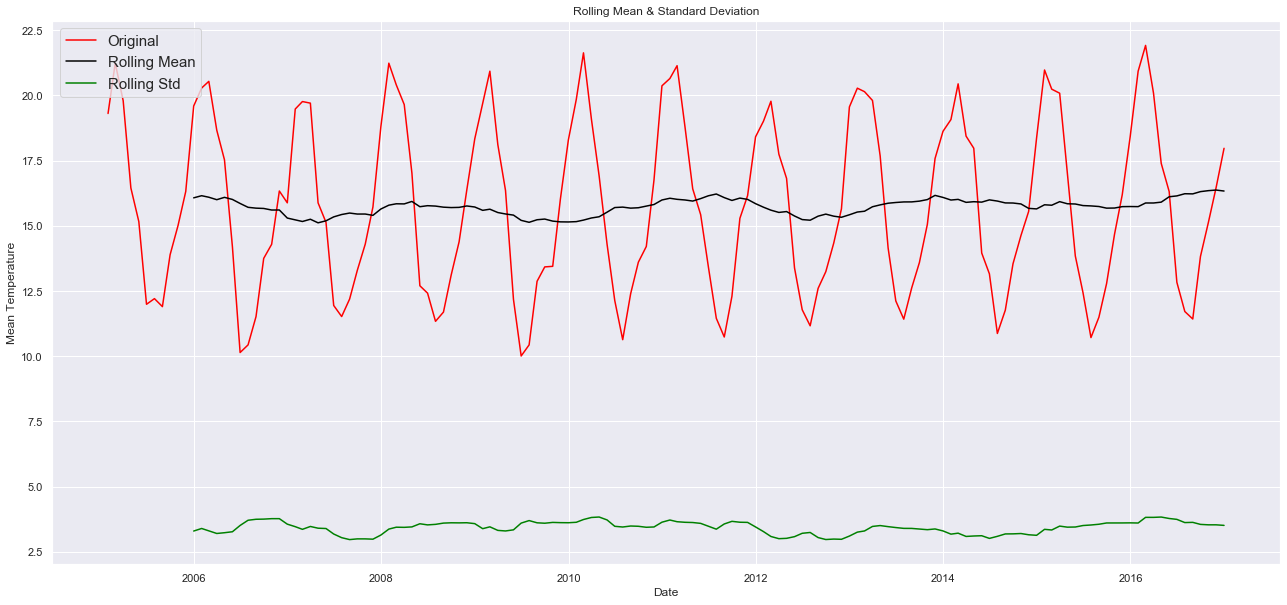%0A)

    Test statistic: -2.768903533019698
    p-value: 0.0628547998004625
    Critical Values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}

=======================================================================================================================  
Since p-value (0.0629) \> 5%, then we do not reject \$H_0\$  
Thus, the data is non-stationary.

And above graph shows when the data is smoothed using MA(12). Here we
can see that the average mean and std is not constant yet.  
Thus, the graph also shows that the data is non-stationary.
=======================================================================================================================  

### Check Seasonality of The Data<a href="#Check-Seasonality-of-The-Data" class="anchor-link">¶</a>

In \[13\]:

    seasonal_decompose(ts_train, model = 'additive', period = 12).plot()
    plt.show()

![](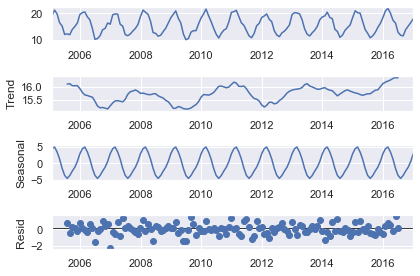%0A)

=======================================================================================================================  
There is seasonality but no constant trend exist.
=======================================================================================================================  

## Modelling The Time Series Train Dataset<a href="#Modelling-The-Time-Series-Train-Dataset" class="anchor-link">¶</a>

### The ACF<a href="#The-ACF" class="anchor-link">¶</a>

In \[14\]:

    sgt.plot_acf(ts_train.temperature, zero = False, lags = 40)
    plt.title("ACF for Daily Average Temperature in Auckland", size = 20)
    plt.show()

![](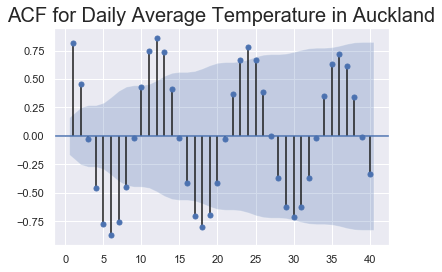%0A)

### The PACF<a href="#The-PACF" class="anchor-link">¶</a>

In \[15\]:

    sgt.plot_pacf(ts_train.temperature[1:], lags = 40, alpha = 0.05, zero = False, method = ('OLS'))
    plt.title("PACF for Daily Average Temperature in Auckland", size = 20)
    plt.show()

![](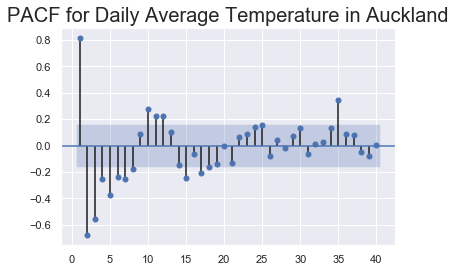%0A)

=======================================================================================================================  

1.  The ACF trailed off to zero rather quickly and shows pattern. It
    means that the data shows no trend, but seasonality exist as ACF at
    lags 6, 12, 18, and 24 are significant but slowly decreasing.
2.  The PACF spike at lag 1, 2, and 3 and the rest is not significant.

In conclusion, Since the ACF shows no trend and additive seasonal
variability exist, we will try to use seasonal differencing (d = 0 and D
= 1).\</font>
=======================================================================================================================  

### Seasonal Differencing<a href="#Seasonal-Differencing" class="anchor-link">¶</a>

In \[16\]:

    resample = ts_train.resample("M")
    monthly_mean = resample.mean()
    ts_train_sdiff = list()
    months_in_year = 12
    for i in range(months_in_year, len(monthly_mean)):
        value = monthly_mean.iloc[i] - monthly_mean.iloc[i - months_in_year]
        ts_train_sdiff.append(value)
    pyplot.title("The Monthly Average Temperature in Auckland Data after Seasonal Differencing (D = 1)")
    pyplot.plot(ts_train_sdiff)
    pyplot.show()

![](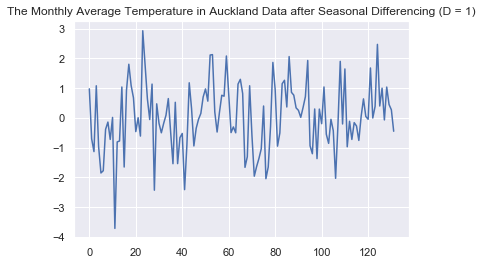%0A)

In \[17\]:

    pd.DataFrame(ts_train_sdiff).dropna(inplace = True) # due to shifting there is nan values
    # check stationary:adfuller test
    check_adfuller(ts_train_sdiff)

    Test statistic: -6.1429469858171535
    p-value: 7.890596422370881e-08
    Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}

=======================================================================================================================  
Since p-value (0.0004) \< 5%, then we reject \$H_0\$  
Thus, the data is stationary.
=======================================================================================================================  

### ACF and PACF for D = 1<a href="#ACF-and-PACF-for-D-=-1" class="anchor-link">¶</a>

In \[18\]:

    sgt.plot_acf(ts_train_sdiff, zero = False, lags = 40)
    plt.title("ACF for Daily Average Temperature in Auckland", size = 20)

    sgt.plot_pacf(ts_train_sdiff[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
    plt.title("PACF for Daily Average Temperature in Auckland", size = 20)

    plt.show()

![](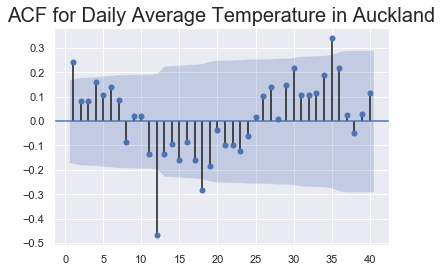%0A)

![](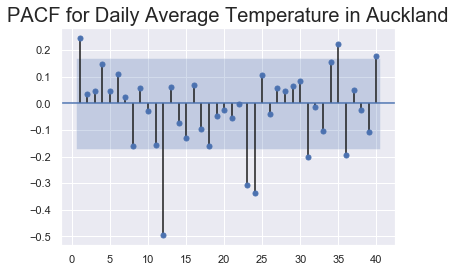%0A)

=======================================================================================================================  

1.  The ACF shows a spike at lag 1, 12, 18, and 35 but no other
    significant spikes. It indicating MA(1) and SMA(1)
2.  The PACF shows a spike at lag 1, 12, 23, 24, 31, 35, and 36 but no
    other significant spikes. It indicating AR(1) and SAR (2) / SAR(3)

Therefore, we will try:  
SARIMA(1,0,0)(2,1,0)\$\_{12}\$  
SARIMA(1,0,0)(3,1,0)\$\_{12}\$  
SARIMA(0,0,1)(0,1,1)\$\_{12}\$  
SARIMA(1,0,1)(2,1,1)\$\_{12}\$  
SARIMA(1,0,1)(3,1,1)\$\_{12}\$
=======================================================================================================================  

### The SARIMA Model<a href="#The-SARIMA-Model" class="anchor-link">¶</a>

#### SARIMA(1,0,0)(2,1,0)\$\_{12}\$<a href="#SARIMA(1,0,0)(2,1,0)$_%7B12%7D$" class="anchor-link">¶</a>

In \[19\]:

    model_sarima1 = SARIMAX(ts_train.temperature, order = (1, 0, 0), seasonal_order = (2, 1, 0, 12))
    results_sarima1 = model_sarima1.fit()

#### SARIMA(1,0,0)(3,1,0)\$\_{12}\$<a href="#SARIMA(1,0,0)(3,1,0)$_%7B12%7D$" class="anchor-link">¶</a>

In \[20\]:

    model_sarima2 = SARIMAX(ts_train.temperature, order = (1, 0, 0), seasonal_order = (3, 1, 0, 12))
    results_sarima2 = model_sarima2.fit()

#### SARIMA(0,0,1)(0,1,1)\$\_{12}\$<a href="#SARIMA(0,0,1)(0,1,1)$_%7B12%7D$" class="anchor-link">¶</a>

In \[21\]:

    model_sarima3 = SARIMAX(ts_train.temperature, order = (0, 0, 1), seasonal_order = (0, 1, 1, 12))
    results_sarima3 = model_sarima3.fit()

#### SARIMA(1,0,1)(2,1,1)\$\_{12}\$<a href="#SARIMA(1,0,1)(2,1,1)$_%7B12%7D$" class="anchor-link">¶</a>

In \[22\]:

    model_sarima4 = SARIMAX(ts_train.temperature, order = (1, 0, 1), seasonal_order = (2, 1, 1, 12))
    results_sarima4 = model_sarima4.fit()

#### SARIMA(1,0,1)(3,1,1)\$\_{12}\$<a href="#SARIMA(1,0,1)(3,1,1)$_%7B12%7D$" class="anchor-link">¶</a>

In \[23\]:

    model_sarima5 = SARIMAX(ts_train.temperature, order = (1, 0, 1), seasonal_order = (3, 1, 1, 12))
    results_sarima5 = model_sarima5.fit()

### The Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)<a href="#The-Mean-Squared-Error-(MSE)-and-Mean-Absolute-Percentage-Error-(MAPE)" class="anchor-link">¶</a>

In \[24\]:

    MSE1=mean_squared_error(ts_test['temperature'],results_sarima1.forecast(len(ts_test)))
    MSE2=mean_squared_error(ts_test['temperature'],results_sarima2.forecast(len(ts_test)))
    MSE3=mean_squared_error(ts_test['temperature'],results_sarima3.forecast(len(ts_test)))
    MSE4=mean_squared_error(ts_test['temperature'],results_sarima4.forecast(len(ts_test)))
    MSE5=mean_squared_error(ts_test['temperature'],results_sarima5.forecast(len(ts_test)))

In \[25\]:

    def MAPE(Y_actual,Y_Predicted):
        mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
        return mape

In \[26\]:

    sarima1_MAPE = MAPE(ts_test['temperature'],results_sarima1.forecast(len(ts_test)))
    sarima2_MAPE = MAPE(ts_test['temperature'],results_sarima2.forecast(len(ts_test)))
    sarima3_MAPE = MAPE(ts_test['temperature'],results_sarima3.forecast(len(ts_test)))
    sarima4_MAPE = MAPE(ts_test['temperature'],results_sarima4.forecast(len(ts_test)))
    sarima5_MAPE = MAPE(ts_test['temperature'],results_sarima5.forecast(len(ts_test)))

In \[27\]:

    #create a comparison dataframe among the SARIMA model
    p = ['Log Likelihood', 'AIC', 'BIC', 'MSE', 'MAPE']
    m1 = [results_sarima1.llf, results_sarima1.aic, results_sarima1.bic, MSE1, sarima1_MAPE]
    m2 = [results_sarima2.llf, results_sarima2.aic, results_sarima2.bic, MSE2, sarima2_MAPE]
    m3 = [results_sarima3.llf, results_sarima3.aic, results_sarima3.bic, MSE3, sarima3_MAPE]
    m4 = [results_sarima4.llf, results_sarima4.aic, results_sarima4.bic, MSE4, sarima4_MAPE]
    m5 = [results_sarima5.llf, results_sarima5.aic, results_sarima5.bic, MSE5, sarima5_MAPE]

    columns = {' ': p, 
               'SARIMA(1,0,0)(2,1,0)$_{12}$': m1, 
               'SARIMA(1,0,0)(3,1,0)$_{12}$': m2,
               'SARIMA(0,0,1)(0,1,1)$_{12}$': m3,
               'SARIMA(1,0,1)(2,1,1)$_{12}$': m4,
               'SARIMA(1,0,1)(3,1,1)$_{12}$': m5}
    compare = pd.DataFrame(columns).set_index(' ')
    compare

Out\[27\]:

|                | SARIMA(1,0,0)(2,1,0)\$\_{12}\$ | SARIMA(1,0,0)(3,1,0)\$\_{12}\$ | SARIMA(0,0,1)(0,1,1)\$\_{12}\$ | SARIMA(1,0,1)(2,1,1)\$\_{12}\$ | SARIMA(1,0,1)(3,1,1)\$\_{12}\$ |
|----------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|--------------------------------|
|                |                                |                                |                                |                                |                                |
| Log Likelihood | -169.372601                    | -169.106218                    | -166.005302                    | -164.732782                    | -168.126892                    |
| AIC            | 346.745202                     | 348.212435                     | 338.010603                     | 341.465565                     | 350.253785                     |
| BIC            | 358.276410                     | 362.626445                     | 346.659009                     | 358.762376                     | 370.433398                     |
| MSE            | 0.644930                       | 0.624853                       | 0.607299                       | 0.612739                       | 0.696861                       |
| MAPE           | 3.990221                       | 3.890100                       | 3.457434                       | 3.478895                       | 4.205708                       |

=======================================================================================================================  
Based on the comparison table above, the best model to use is between
SARIMA(0,0,1)(0,1,1)\$\_{12}\$ and SARIMA(1,0,1)(2,1,1)\$\_{12}\$ model
since SARIMA(0,0,1)(0,1,1)\$\_{12}\$ has the lowest value of AIC, BIC,
MSE, and MAPE and SARIMA(1,0,1)(2,1,1)\$\_{12}\$ has the largest value
of Log Likelihood.  

We should choose the best model by checking the LLR test.  
=======================================================================================================================  

### LLR Test<a href="#LLR-Test" class="anchor-link">¶</a>

In \[28\]:

    def LLR_test(mod_1, mod_2, DF):
        L1 = mod_1.llf
        L2 = mod_2.llf
        LR = (2*(L2 - L1))    
        p = chi2.sf(LR, DF).round(3)
        return p

In \[29\]:

    LLR_test(results_sarima1, results_sarima2, 1)

Out\[29\]:

    0.465

=======================================================================================================================  
Since The LLR Result is higher than 5%, The
SARIMA(1,0,0)(2,1,0)\$\_{12}\$ Model is a better model than the
SARIMA(1,0,0)(3,1,0) \$\_{12}\$ Model
=======================================================================================================================  

In \[30\]:

    LLR_test(results_sarima3, results_sarima1, 1)

Out\[30\]:

    1.0

=======================================================================================================================  
Since The LLR Result is higher than 5%, The
SARIMA(0,0,1)(0,1,1)\$\_{12}\$ Model is a better model than the
SARIMA(1,0,0)(2,1,0)\$\_{12}\$ Model
=======================================================================================================================  

In \[31\]:

    LLR_test(results_sarima3, results_sarima4, 3)

Out\[31\]:

    0.467

=======================================================================================================================  
Since The LLR Result is higher than 5%, The
SARIMA(0,0,1)(0,1,1)\$\_{12}\$ Model is a better model than the
SARIMA(1,0,1)(2,1,1)\$\_{12}\$ Model
=======================================================================================================================  

In \[32\]:

    LLR_test(results_sarima3, results_sarima5, 4)

Out\[32\]:

    1.0

=======================================================================================================================  
Since The LLR Result is higher than 5%, The
SARIMA(0,0,1)(0,1,1)\$\_{12}\$ Model is a better model than the
SARIMA(1,0,1)(3,1,1)\$\_{12}\$ Model

In conclusion, the LLR test result state that
SARIMA(0,0,1)(0,1,1)\$\_{12}\$ is the best model to use. Let's check the
summary of the result from the SARIMA(0,0,1)(0,1,1)\$\_{12}\$ Model.
=======================================================================================================================  

### Model SARIMA(0, 0, 1)(0, 1, 1)\$\_{12}\$ Summary<a href="#Model-SARIMA(0,-0,-1)(0,-1,-1)$_%7B12%7D$-Summary" class="anchor-link">¶</a>

In \[33\]:

    results_sarima3.summary()

Out\[33\]:

|                  |                                |                   |          |
|------------------|--------------------------------|-------------------|----------|
| Dep. Variable:   | temperature                    | No. Observations: | 144      |
| Model:           | SARIMAX(0, 0, 1)x(0, 1, 1, 12) | Log Likelihood    | -166.005 |
| Date:            | Wed, 07 Jul 2021               | AIC               | 338.011  |
| Time:            | 16:38:05                       | BIC               | 346.659  |
| Sample:          | 01-31-2005                     | HQIC              | 341.525  |
|                  | \- 12-31-2016                  |                   |          |
| Covariance Type: | opg                            |                   |          |

SARIMAX Results

|          |         |         |        |         |         |         |
|----------|---------|---------|--------|---------|---------|---------|
|          | coef    | std err | z      | P>\|z\| | \[0.025 | 0.975\] |
| ma.L1    | 0.1760  | 0.094   | 1.876  | 0.061   | -0.008  | 0.360   |
| ma.S.L12 | -0.9980 | 9.639   | -0.104 | 0.918   | -19.890 | 17.894  |
| sigma2   | 0.5787  | 5.558   | 0.104  | 0.917   | -10.315 | 11.472  |

|                         |       |                   |       |
|-------------------------|-------|-------------------|-------|
| Ljung-Box (Q):          | 56.09 | Jarque-Bera (JB): | 2.95  |
| Prob(Q):                | 0.05  | Prob(JB):         | 0.23  |
| Heteroskedasticity (H): | 0.65  | Skew:             | -0.13 |
| Prob(H) (two-sided):    | 0.15  | Kurtosis:         | 3.69  |

  
  
Warnings:  
\[1\] Covariance matrix calculated using the outer product of gradients
(complex-step).

In \[34\]:

    results_sarima3.plot_diagnostics(figsize = (15, 12))
    plt.show()

![](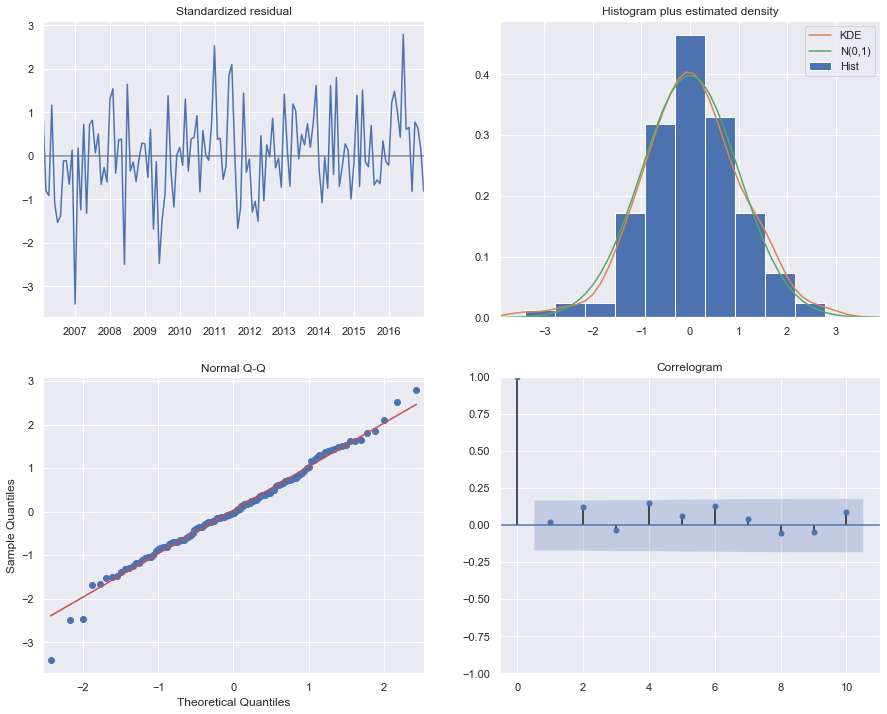%0A)

In \[35\]:

    Resid_sarima3 = results_sarima3.resid[12:]
    Resid_sarima3.mean()

Out\[35\]:

    0.012792516474364059

=======================================================================================================================  
The SMA(0, 0, 1)(0, 1, 1)\$\_{12}\$ Model:  
**\$Y_t = Y\_{t-12} + e_t - 0.9980e\_{t-12} + 0.1760e\_{t-1} - 0.1756
e\_{t-13}\$**  

\$Y_t\$ : *The average temperature at time t*  
\$Y\_{t-12}\$ : *The average temperature at time t-12*  
\$e\_{t-12}\$ : *The residual/error at lag 12*  
\$e\_{t-1}\$ : *The residual/error at lag 1*  
\$e\_{t-13}\$ : *The residual/error at lag 13*  

From the SARIMAX summary, the p-value of all coefficients is greater
than 0.05 which means all variables present in the model is not
significant. The Jarque-Bera (JB) p-value \> 0.05 which means the
residual is normal distribution. The Heteroskedasticity (H) p-value \>
0.05 which means the variance is constant.

Supported from the normal Q-Q plot, we can see that we almost have a
straight line, which suggest normality in error distribution. Also, the
correlogram on the bottom right suggests that there is no
autocorrelation in the residuals, and so they are effectively white
noise.  

Since there is no significant variable in SARIMA(0, 0, 1)(0, 1,
1)\$\_{12}\$, then we should find the second best model from the fifth
model above. Based on the AIC, BIC, Likelihood, MSE, and MAPE, the
second best model is SARIMA(1,0,1)(2,1,1)\$\_{12}\$. We will confirm
this by checking the LLR test.  
=======================================================================================================================  

### Find The Second Best Model Using LLR Test<a href="#Find-The-Second-Best-Model-Using-LLR-Test" class="anchor-link">¶</a>

In \[36\]:

    LLR_test(results_sarima1, results_sarima2, 1)

Out\[36\]:

    0.465

=======================================================================================================================  
Since The LLR Result is higher than 5%, The
SARIMA(1,0,0)(2,1,0)\$\_{12}\$ Model is a better model than the
SARIMA(1,0,0)(3,1,0) \$\_{12}\$ Model
=======================================================================================================================  

In \[37\]:

    LLR_test(results_sarima1, results_sarima4, 2)

Out\[37\]:

    0.01

=======================================================================================================================  
Since The LLR Result is lower than 5%, The
SARIMA(1,0,1)(2,1,1)\$\_{12}\$ Model is a better model than the
SARIMA(1,0,0)(2,1,0) \$\_{12}\$ Model
=======================================================================================================================  

In \[38\]:

    LLR_test(results_sarima4, results_sarima5, 1)

Out\[38\]:

    1.0

=======================================================================================================================  
Since The LLR Result is higher than 5%, The
SARIMA(1,0,1)(2,1,1)\$\_{12}\$ Model is a better model than the
SARIMA(1,0,1)(3,1,1) \$\_{12}\$ Model.

Therefore, it supports our hypothesis that the The
SARIMA(1,0,1)(2,1,1)\$\_{12}\$ Model is the second best model after the
SARIMA(0, 0, 1)(0, 1, 1)\$\_{12}\$ model.

Now, let's see the summary of the SARIMA(1,0,1)(2,1,1)\$\_{12}\$ model.
=======================================================================================================================  

### Model SARIMA(1, 0, 1)(2, 1, 1)\$\_{12}\$ Summary<a href="#Model-SARIMA(1,-0,-1)(2,-1,-1)$_%7B12%7D$-Summary" class="anchor-link">¶</a>

In \[39\]:

    results_sarima4.summary()

Out\[39\]:

|                  |                                |                   |          |
|------------------|--------------------------------|-------------------|----------|
| Dep. Variable:   | temperature                    | No. Observations: | 144      |
| Model:           | SARIMAX(1, 0, 1)x(2, 1, 1, 12) | Log Likelihood    | -164.733 |
| Date:            | Wed, 07 Jul 2021               | AIC               | 341.466  |
| Time:            | 16:38:07                       | BIC               | 358.762  |
| Sample:          | 01-31-2005                     | HQIC              | 348.494  |
|                  | \- 12-31-2016                  |                   |          |
| Covariance Type: | opg                            |                   |          |

SARIMAX Results

|          |         |         |        |         |         |         |
|----------|---------|---------|--------|---------|---------|---------|
|          | coef    | std err | z      | P>\|z\| | \[0.025 | 0.975\] |
| ar.L1    | 0.7458  | 0.225   | 3.315  | 0.001   | 0.305   | 1.187   |
| ma.L1    | -0.5910 | 0.272   | -2.169 | 0.030   | -1.125  | -0.057  |
| ar.S.L12 | -0.0593 | 0.151   | -0.393 | 0.694   | -0.355  | 0.236   |
| ar.S.L24 | -0.0299 | 0.138   | -0.217 | 0.828   | -0.300  | 0.240   |
| ma.S.L12 | -0.9964 | 7.819   | -0.127 | 0.899   | -16.322 | 14.329  |
| sigma2   | 0.5605  | 4.332   | 0.129  | 0.897   | -7.929  | 9.050   |

|                         |       |                   |       |
|-------------------------|-------|-------------------|-------|
| Ljung-Box (Q):          | 50.70 | Jarque-Bera (JB): | 2.20  |
| Prob(Q):                | 0.12  | Prob(JB):         | 0.33  |
| Heteroskedasticity (H): | 0.66  | Skew:             | -0.12 |
| Prob(H) (two-sided):    | 0.17  | Kurtosis:         | 3.59  |

  
  
Warnings:  
\[1\] Covariance matrix calculated using the outer product of gradients
(complex-step).

In \[40\]:

    results_sarima4.plot_diagnostics(figsize = (15, 12))
    plt.show()

![](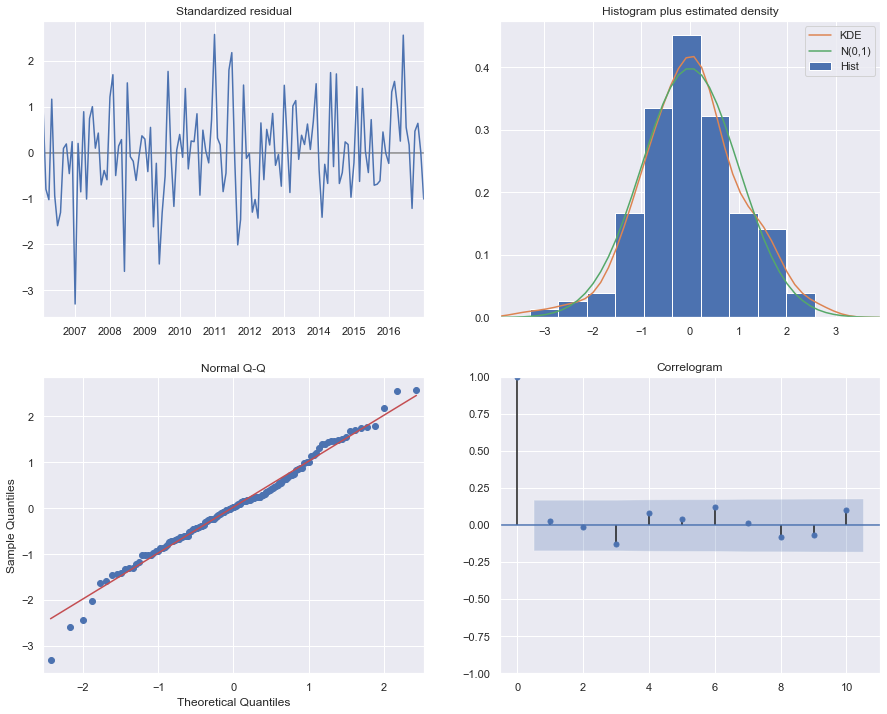%0A)

In \[41\]:

    Resid_sarima4 = results_sarima4.resid[12:]
    Resid_sarima4.mean()

Out\[41\]:

    0.007008492813104853

=======================================================================================================================  
The SARIMA(1, 0, 1)(2, 1, 1)\$\_{12}\$ Model:  
**\$Y_t = 0.9701Y\_{t-12} - 0.0299Y\_{t-24} + 0.7458Y\_{t-1} -
0.7235Y\_{t-13} + 0.0223Y\_{t-25} - 0.9964e\_{t-12} - 0.5910e\_{t-1} +
0.5889e\_{t-13} + e_t\$**  

\$Y_t\$ : *The average temperature at time t*  
\$Y\_{t-12}\$ : *The average temperature at time t-12*  
\$Y\_{t-12}\$ : *The average temperature at time t-24*  
\$Y\_{t-1}\$ : *The average temperature at time t-1*  
\$Y\_{t-13}\$ : *The average temperature at time t-13*  
\$Y\_{t-25}\$ : *The average temperature at time t-25*  
\$e\_{t-12}\$ : *The residual/error at lag 12*  
\$e\_{t-1}\$ : *The residual/error at lag 1*  
\$e\_{t-13}\$ : *The residual/error at lag 13*  

From the SARIMAX summary, the p-value of AR (p) and MA (q) is lower than
0.05 which means they are significant and the rest is not significant.
The Jarque-Bera (JB) p-value \> 0.05 which means the residual is normal
distribution. The Ljung Box (Q) prob \> 0.05 which means there is no
autocorrelation with the residuals. The Heteroskedasticity (H) p-value
\> 0.05 which means the variance is constant.

Supported from the normal Q-Q plot, we can see that we almost have a
straight line, which suggest normality in error distribution. Also, the
correlogram on the bottom right suggests that there is no
autocorrelation in the residuals, and so they are effectively white
noise.  
=======================================================================================================================  

=======================================================================================================================  
In conclusion, both model is a very good model to predict the monthly
average temperature in Auckland. If the significance of the variables is
the factor that we want to highlight, then choose the SARIMA(1, 0, 1)(2,
1, 1)\$\_{12}\$ model. But, if the other goodness of fit (AIC, BIC), the
error of prediction, and the simplest parameter are the factors that we
want to highlight, then choose the SARIMA(0, 0, 1)(0, 1, 1)\$\_{12}\$
model.

Therefore we will use both model to forecast the average temperature
data in Auckland.
=======================================================================================================================  

## Predicting and Forecasting Test Data<a href="#Predicting-and-Forecasting-Test-Data" class="anchor-link">¶</a>

### The SMA(0, 0, 1)(0, 1, 1)\$\_{12}\$ Model<a href="#The-SMA(0,-0,-1)(0,-1,-1)$_%7B12%7D$-Model" class="anchor-link">¶</a>

In \[42\]:

    ts_train['predicted_temperature3'] = results_sarima3.predict(start = ts_train.index[12])
    ts_test['predicted_temperature3'] = results_sarima3.forecast(len(ts_test))
    Forecast1 = results_sarima3.forecast(len(ts_test) + 24)
    Forecast1 = Forecast1[len(ts_test):]

### Plotting Train, Test, and Forecast Dataset<a href="#Plotting-Train,-Test,-and-Forecast-Dataset" class="anchor-link">¶</a>

In \[43\]:

    plt.figure(figsize = (8, 5))
    plt.plot(ts_train.temperature, label = "Actual Train")
    plt.plot(ts_train.predicted_temperature3, label = "Predict Train")
    plt.plot(ts_test.temperature, label = "Actual Test")
    plt.plot(ts_test.predicted_temperature3, label = "Predict Test")
    plt.plot(Forecast1, label = "Forecast")
    plt.title("Train, Test, Predicted, and Forecast Dataset")
    plt.legend()
    plt.show()

![](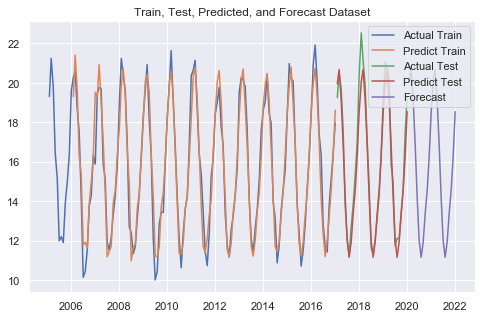%0A)

In \[44\]:

    print(f"The R\N{SUPERSCRIPT TWO} score for the test data set: {round(r2_score(ts_test['predicted_temperature3'], ts_test['temperature']),4)}")

    The R² score for the test data set: 0.9406

### The SARIMA(1, 0, 1)(2, 1, 1)\$\_{12}\$ Model<a href="#The-SARIMA(1,-0,-1)(2,-1,-1)$_%7B12%7D$-Model" class="anchor-link">¶</a>

In \[45\]:

    ts_train['predicted_temperature4'] = results_sarima4.predict(start = ts_train.index[12])
    ts_test['predicted_temperature4'] = results_sarima4.forecast(len(ts_test))
    Forecast2 = results_sarima4.forecast(len(ts_test) + 24)
    Forecast2 = Forecast2[len(ts_test):]

### Plotting Train, Test, and Forecast Dataset<a href="#Plotting-Train,-Test,-and-Forecast-Dataset" class="anchor-link">¶</a>

In \[46\]:

    plt.figure(figsize = (8, 5))
    plt.plot(ts_train.temperature, label = "Actual Train")
    plt.plot(ts_train.predicted_temperature4, label = "Predict Train")
    plt.plot(ts_test.temperature, label = "Actual Test")
    plt.plot(ts_test.predicted_temperature4, label = "Predict Test")
    plt.plot(Forecast2, label = "Forecast")
    plt.title("Train, Test, Predicted, and Forecast Dataset")
    plt.legend()
    plt.show()

![](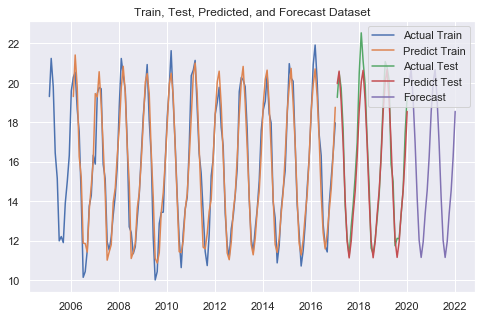%0A)

In \[47\]:

    print(f"The R\N{SUPERSCRIPT TWO} score for the test data set: {round(r2_score(ts_test['predicted_temperature4'], ts_test['temperature']),4)}")

    The R² score for the test data set: 0.94

=======================================================================================================================  

### Conclusion:<a href="#Conclusion:" class="anchor-link">¶</a>

We managed to build two good models, SMA(0, 0, 1)(0, 1, 1)\$\_{12}\$
model and SARIMA(1, 0, 1)(2, 1, 1)\$\_{12}\$ model, which can be seen
from the SARIMAX summary above. Both model can be used since both
\$R^2\$ score is 0.94 and the rest is depends on the factor of which we
want to highlight for the best model to choose.
=======================================================================================================================